In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df = df.drop(columns = ['CustomerID'])

In [5]:
df.duplicated().sum()

0

In [6]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

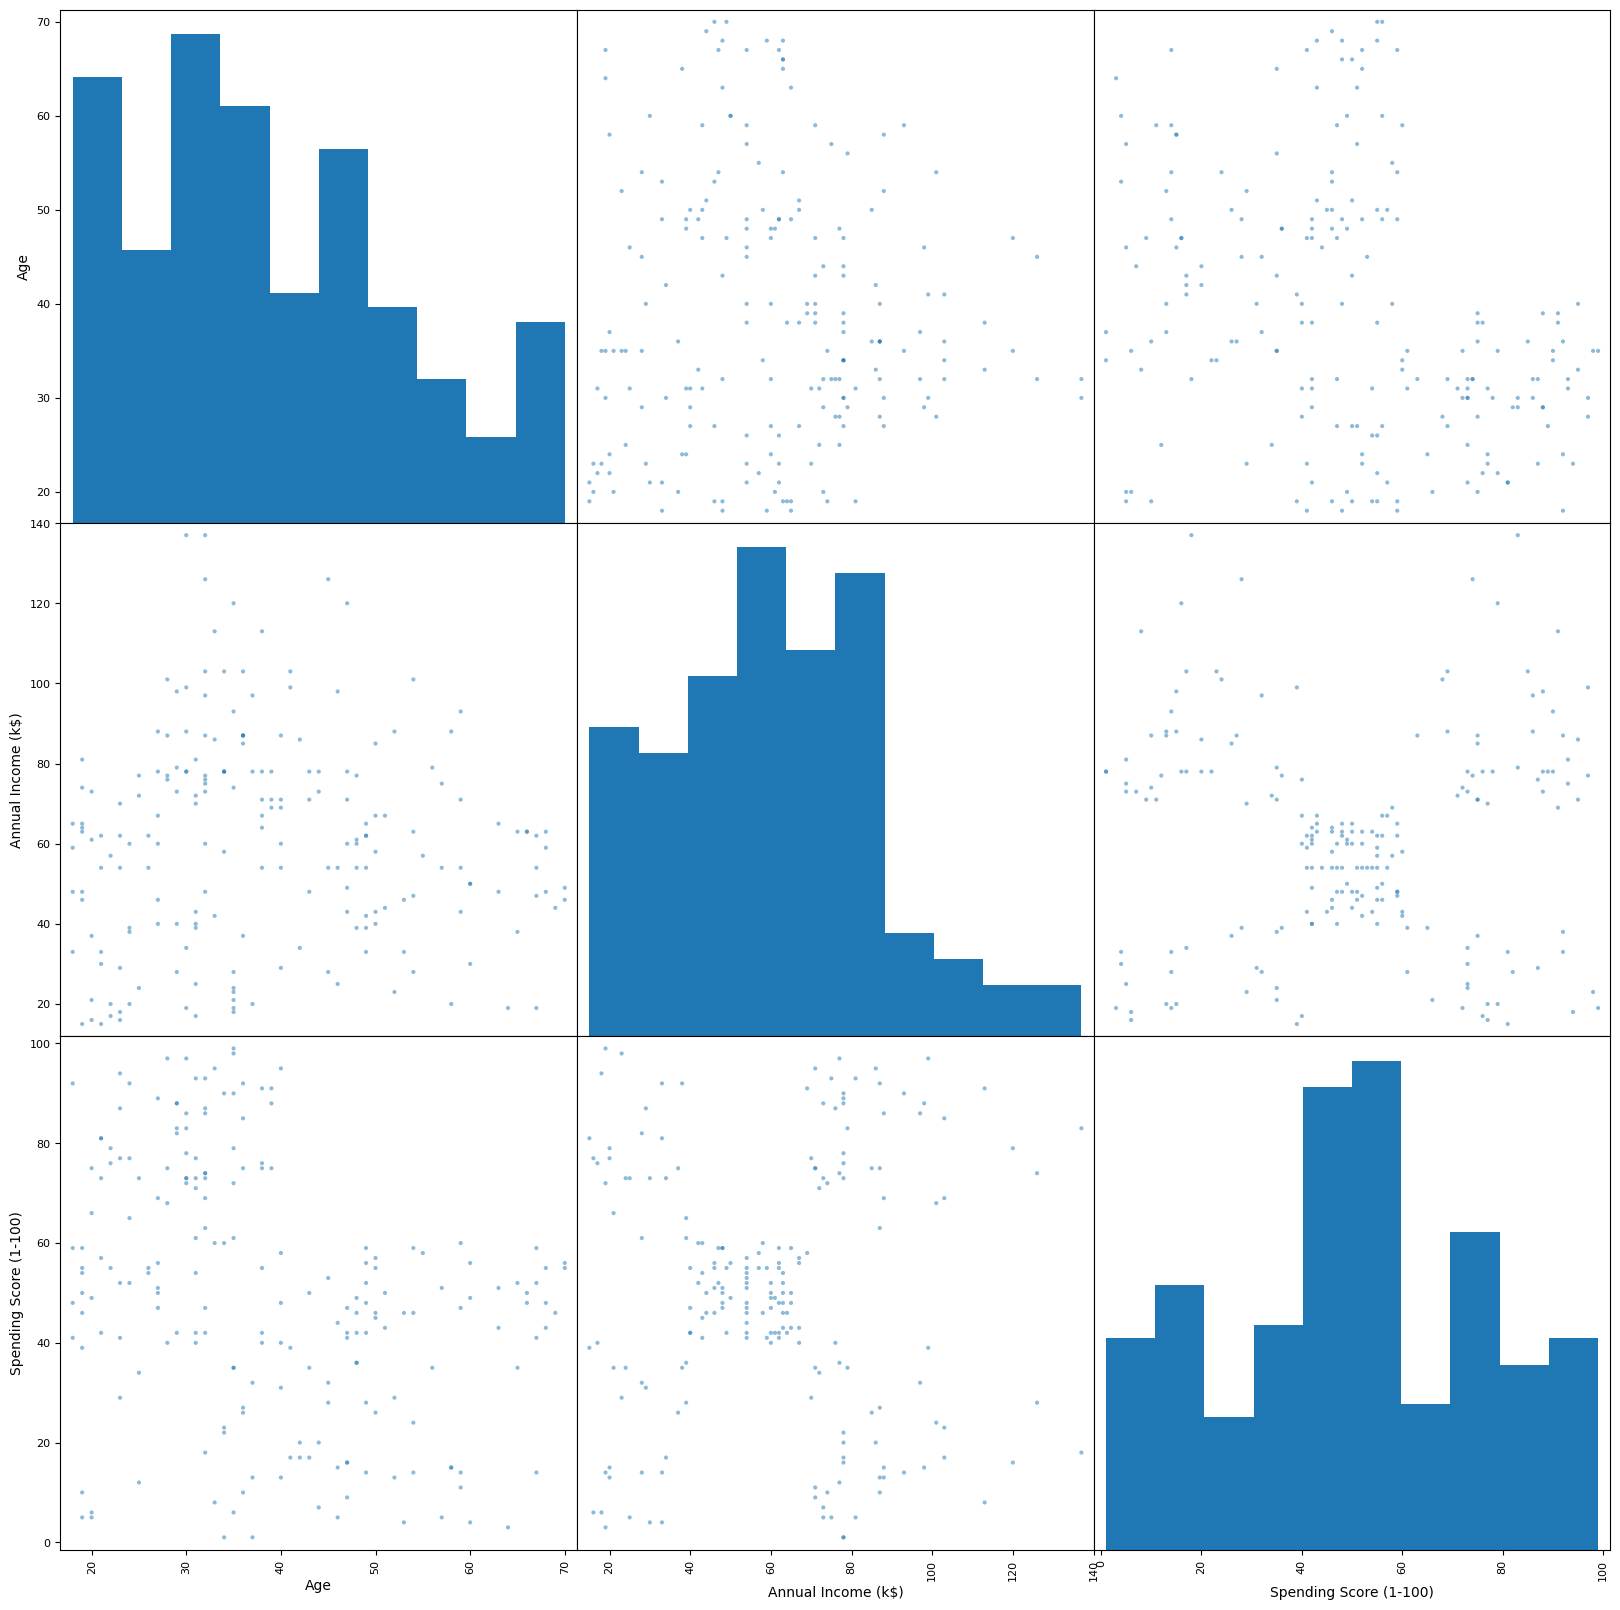

In [9]:
scatter_matrix(df,figsize=(20,20))
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Gender'] = en.fit_transform(df['Gender'])

In [11]:
# df = df.rename(columns = {'Annual Income(k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})

In [12]:
# import plotly.express as px

In [13]:
# import numpy as np
# age = np.array(df['Age'])
# Annual_Income = np.array(df['Annual Income (k$)'])
# Spending_Score = np.array(df['Spending Score (1-100)'])

In [14]:
# px.scatter_3d(x=age,y=Annual_Income,z=Spending_Score)

In [15]:
from sklearn.cluster import KMeans

In [16]:
wcss = []
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [17]:
wcss

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104422.8349853975,
 75399.61541401483,
 58348.64136331505,
 51130.690081263776,
 44389.807673557676,
 40845.949924410976,
 37515.84125504125,
 35333.641602538584,
 32165.898882854053,
 30129.697721762932,
 27835.658391690005,
 26357.310901687488,
 24798.156897475586,
 23357.615548340553,
 21611.332313154682,
 20455.298199023197,
 20357.751895979833]

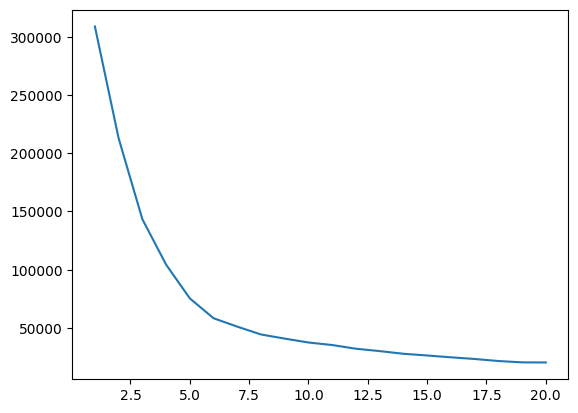

In [18]:
plt.plot(range(1,21),wcss)

In [24]:
km = KMeans(n_clusters=8)

In [25]:
pred = km.fit_predict(df)

C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
df['lable'] = pred

In [27]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),lable
0,1,19,15,39,0
1,1,21,15,81,5
2,0,20,16,6,0
3,0,23,16,77,5
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,6
196,0,45,126,28,3
197,1,32,126,74,6
198,1,32,137,18,3
